# OpenCV

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## resize & interpolation

```
resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
```

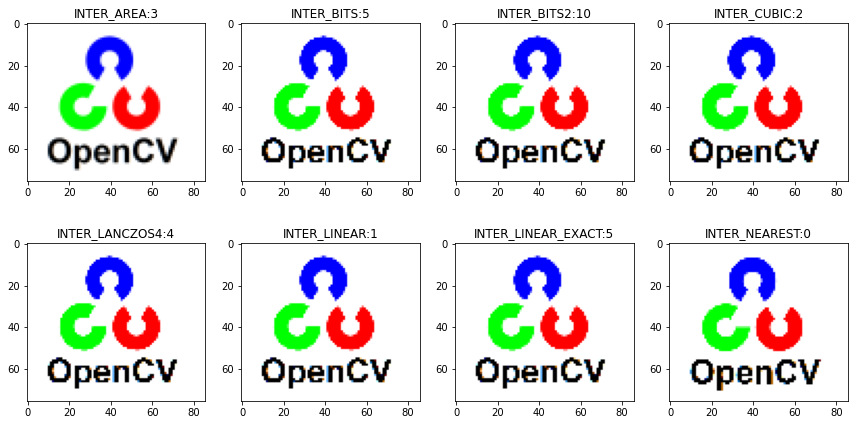

In [95]:
img = cv.imread('./img/logo.png')
# raw
h, w, _ = img.shape

# way 1: use x, y resolution
img_zoom1 = cv.resize(img, ((int(w/2)), int(h/2)))

# way 2: use proportion 
# (the resolution set None, or (0, 1), (-1, 0) etc.)
img_zoom2 = cv.resize(img, None, fx=1.3, fy = 1.3)

interpo    = [  
    cv.INTER_AREA,
    cv.INTER_BITS,
    cv.INTER_BITS2,
    cv.INTER_CUBIC,
    cv.INTER_LANCZOS4,
    cv.INTER_LINEAR,
    cv.INTER_LINEAR_EXACT,
    cv.INTER_NEAREST
]
str_rep    = [
    'INTER_AREA',
    'INTER_BITS',
    'INTER_BITS2',
    'INTER_CUBIC',
    'INTER_LANCZOS4',
    'INTER_LINEAR',
    'INTER_LINEAR_EXACT',
    'INTER_NEAREST'
]
#                 cv.INTER_TAB_SIZE,
#                 cv.INTER_TAB_SIZE2,
#                 cv.INTER_MAX

# 用plt绘制的话，要手动设置figsize仍然需要添加一行代码
# 而且还不好设sharex, sharey
# plt.rcParams["figure.figsize"] = (40,16)
plt.subplots_adjust(left=.1, right=2, top=1.5, bottom=.1)
for idx, i in enumerate(interpo):
# for i in range(10):
#     if i >5: continue
#     print(idx, i)
    image = cv.resize(img, None, fx=.2, fy = .2, interpolation=i)
    plt.subplot(2, 4, idx+1)
    plt.title(str_rep[idx]+':'+str(i))#, fontsize=40)
    plt.imshow(image)

In [43]:
# fig = plt.figure(figsize=(60,60))

# 可以用fig来添加plot
# 也可以仍然用plt

# ax1 = fig.add_subplot(131)
# ax2 = fig.add_subplot(132, sharex=ax1)
# ax3 = fig.add_subplot(133, sharex=ax1)
# ax1.imshow(img)
# ax2.imshow(size_half)
# ax3.imshow(size_double)

# Affine
```
cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])->dst
```
- src: 输入的目标图像
- M ： 系数矩阵
- dsize ：缩放尺度（实测为裁剪）
- flags：可以供选择的插值方式
- borderMode: 可以指定边界处理方法，可以是复制边缘，填充常量等

$M=
\begin{bmatrix}
rotate&rotate&translate\ x \\
rotate&rotate&translate\ y \\
1&1&1
\end{bmatrix}
$

(428, 378, 3)


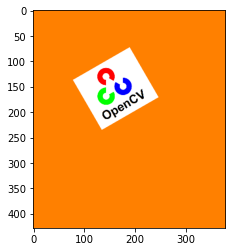

In [18]:
# rotation

# 绕(0,0), 30度(极坐标方向），缩放0.3
M = cv.getRotationMatrix2D((w/2,h/2), 30, 0.3)

# transform

M[0, 2] -= 30
M[1, 2] -= 50

# 填充边界是常量， 填充系数是橙色
# 这里如果w,h除以2，不是图像缩放了，而是只展示这部分内的图像
# 应该叫裁剪
img1 = cv.warpAffine(img, M, (w, h), \
                      flags=cv.INTER_CUBIC, \
                      borderMode=cv.BORDER_CONSTANT, \
                      borderValue=(0, 128, 255))
print(img1.shape)
# plt.rcParams["figure.figsize"] = (6,4)
plt.imshow(img1[:,:,::-1])

In [19]:
# 应用
# 标记两张图片的兴趣点
# 把一张图片仿射到另一张图片上
# 再按一定权重融合

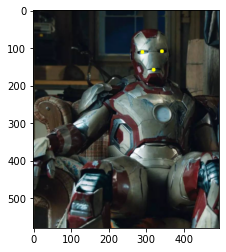

In [190]:
man      = cv.imread('./img/ironman.png')
roi_man  = ((290,111), (342,109), (320,158))

for point in roi_man:
    cv.circle(man, point, 5, (0, 255, 255), -1)

plt.imshow(man[...,::-1])

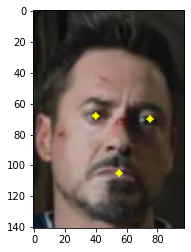

In [191]:
face     = cv.imread('./img/tony.jpg')
roi_face = ((40,68), (75,70), (55,105))

for point in roi_face:
    cv.circle(face, point, 2, (0, 255, 255), -1)
    
plt.imshow(face[...,::-1])

In [192]:
(ax, ay), (bx, by), (cx, cy)       = roi_face
(dax, day), (dbx, dby), (dcx, dcy) = roi_man

A = np.array([
    [ax, ay, 1, 0,  0,  0],
    [0,  0,  0, ax, ay, 1],
    [bx, by, 1, 0,  0,  0],
    [0,  0,  0, bx, by, 1],
    [cx, cy, 1, 0,  0,  0],
    [0,  0,  0, cx, cy, 1]
])

B = np.array([
    dax,
    day,
    dbx,
    dby,
    dcx,
    dcy
]).T

M = np.linalg.inv(A.T @ A) @ A.T @ B
M = M.reshape(2, 3)
M

array([[ 1.47351779e+00,  2.13438735e-01,  2.16545455e+02],
       [-1.32806324e-01,  1.32411067e+00,  2.62727273e+01]])

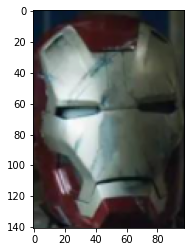

In [194]:
body  = cv.imread('./img/ironman.png')
face2 = cv.imread('./img/tony.jpg')

body_h, body_w, _ = body.shape

f_h, f_w, _ = face.shape  # with offset (250, 40)
roi = body[47:47+roi_h, 263:263+roi_w]
roi_face = cv.resize(face2, (roi.shape[0:2])[::-1])

plt.imshow(roi_face[...,::-1])
plt.imshow(roi[...,::-1])

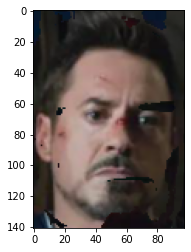

In [217]:
face_gray = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)

# 刷黑(0)就是透明
ret, mask_bg = cv.threshold(face_gray, 22, 255, cv.THRESH_BINARY)
mask_fg = cv.bitwise_not(mask_bg)

bg = cv.bitwise_and(roi_face, roi_face, mask = mask_bg)
fg = cv.bitwise_and(roi, roi, mask = mask_fg)

face3 = cv.resize(cv.add(bg, fg), (face.shape[0:2][::-1]))
               
plt.imshow(face3[...,::-1])

((579, 494, 3), (141, 98, 3))

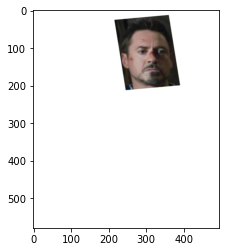

In [229]:
# face3 是融合后的，没啥用
# 要边缘平滑还得试试别的
face_affine = cv.warpAffine(face2, M, (body_w, body_h), \
                            borderValue=(255, 255, 255))
plt.imshow(face_affine[...,::-1])
body.shape, face.shape

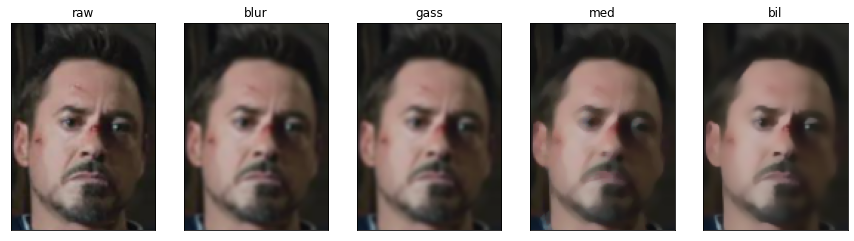

In [230]:

# 模糊
img=face2
blur=cv.blur(img,(3,3))             #均值滤波，像素的平均值来代替中心元素
gass=cv.GaussianBlur(img,(5,5),0)   #高斯滤波，核尺寸位5x5。以及高斯函数沿 X，Y 方向的标准差0。
med=cv.medianBlur(img,5)            #中值滤波，卷积框对应像素的中值来替代中心像素的值，对像素周围的25个值排序，找出中值
bil=cv.bilateralFilter(img,9,75,75) #双边滤波，9邻域直径，两个 75 分别是空间高斯函数标准差，灰度值相似性高斯函数标准差

images=[face2,blur,gass,med,bil]
titles=['raw','blur','gass','med','bil']
figsize = plt.rcParams['figure.figsize']
plt.figure(figsize = (15, 15))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i][...,::-1])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
plt.rcParams['figure.figsize'] = figsize

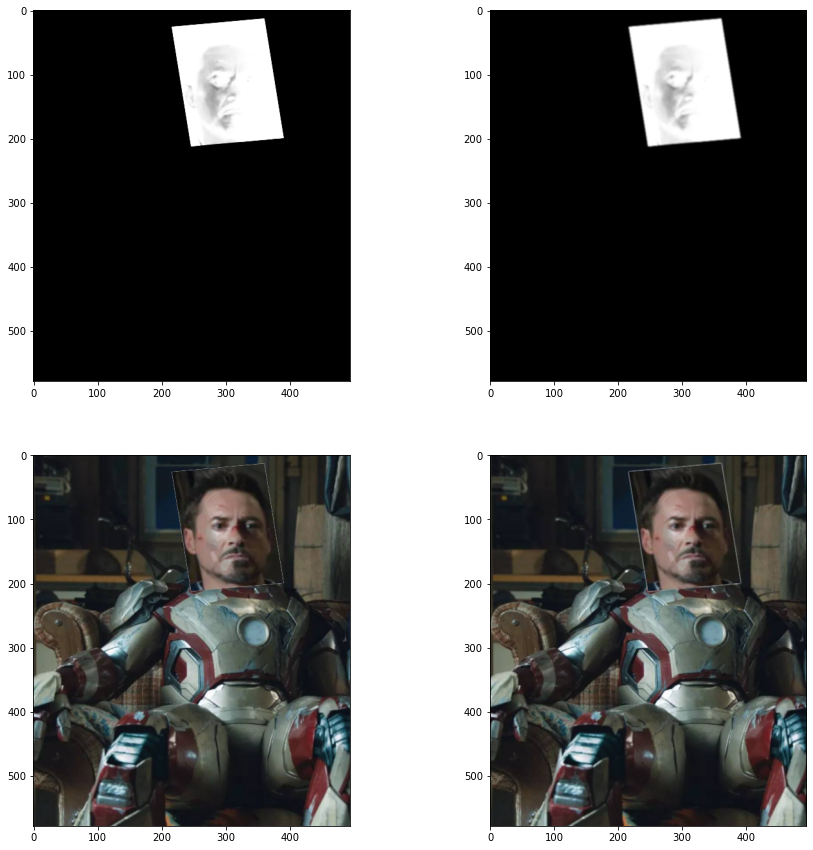

In [243]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
# 每个像素变成(0,1)的范围
weight  = np.abs(face_affine / 255 - 1)
tw = np.copy(weight)
tw = np.fmax(weight[...,0], weight[...,1])
tw = sigmoid((tw - 0.3) * 12)
tw = tw[...,None]
m2 = (tw * face_affine + (1 - tw) * body).astype(np.uint8)
# 蓝绿通道比较，把大数字混合，因为用的是索引，降了一维
# 正好用来跟红色通道进行比较
weight  = np.fmax(np.fmax(weight[...,0], weight[...,1]), weight[...,2])
weight  = sigmoid((weight - 0.3) * 12)  # 这个数字慢慢调
# 变回三维有很多技巧[...,None], [...,np.newaxis], reshape等等...
weight  = cv.GaussianBlur(weight, (5,5),0)   # gaussian blur
weight  = weight[...,None]
merge = (weight * face_affine + (1 - weight) * body).astype(np.uint8)
figsize = plt.rcParams['figure.figsize']
plt.figure(figsize = (15, 15))
plt.subplot(221)
plt.imshow(tw, cmap='gray')
plt.subplot(222)
plt.imshow(weight[...,::-1], cmap='gray')
plt.subplot(223)
plt.imshow(m2[...,::-1], cmap='gray')
plt.subplot(224)
plt.imshow(merge[...,::-1])
plt.rcParams['figure.figsize'] = figsize

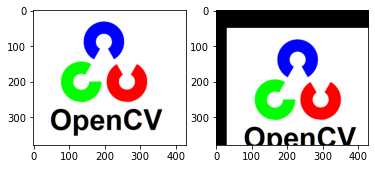

In [99]:
# tranform

# 其实前面做rotation的时候就已经演示了
# 用rotation的语法糖返出一个变换矩阵M
# 然后去更新M的[0, 2]和[1, 2]

# 当然自己也可以构造这个矩阵
# 因为没有旋转，那[1, 0], [0, 1]这两个轴就不需要变化

M=np.float32([[1, 0, 30],[0, 1, 50]])
dst=cv.warpAffine(img, M, (w, h))

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)

In [6]:
# prespective